In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Url = 'https://raw.githubusercontent.com/IT22106360/QuantaML-FDM-Employee-Retention/refs/heads/main/artifacts/preprocessed_dataset.csv'
imbl_dataset = pd.read_csv(Url, encoding='latin-1')
imbl_dataset

,city_development_index,relevent_experience,education_level,experience,last_new_job,target
0,0.920,1,2.0,0.0,1.0,1
1,0.776,0,2.0,0.0,5.0,0
2,0.624,0,2.0,0.0,0.0,0
3,0.789,0,2.0,0.0,0.0,1
4,0.767,1,2.0,0.0,4.0,0
...,...,...,...,...,...,...
19153,0.878,0,2.0,0.0,1.0,1
19154,0.920,1,2.0,0.0,4.0,1
19155,0.920,1,2.0,0.0,4.0,0
19156,0.802,1,2.0,0.0,2.0,0


In [3]:
X = imbl_dataset.drop('target', axis=1)  # Features
y = imbl_dataset['target']  # target variable

In [4]:
X.shape
y.shape

(19158,)

In [5]:
y.value_counts()

target
0    14381
1     4777
Name: count, dtype: int64

Class imbalance handling
-------------------------

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
smote = SMOTE(sampling_strategy='minority')

# fit the object to our training data
X, y = smote.fit_resample(imbl_dataset.loc[:,imbl_dataset.columns!='target'], imbl_dataset['target'])
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (28762, 5)
Shape of y: (28762,)


In [8]:
print(X.duplicated().sum())

26483


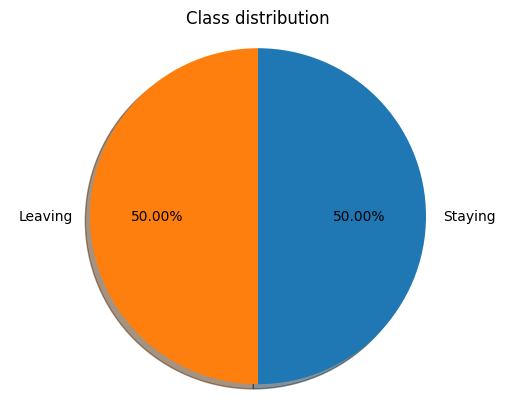

# samples associated with not leaving: 14381
# samples associated with leaving: 14381


In [9]:
_, class_counts = np.unique(y, return_counts=True)
classes = ['Staying', 'Leaving']
fig, ax = plt.subplots()
ax.pie(class_counts, labels=classes, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with not leaving: {}".format(class_counts[0]))
print("# samples associated with leaving: {}".format(class_counts[1]))

Modeling

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [11]:
def modeler(model, X, y, param_grid=None):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    if param_grid:
        # Use GridSearchCV to find the best hyperparameters
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
        grid_search.fit(x_train, y_train)
        model = grid_search.best_estimator_  # Get the best model
        print("Best Parameters: ", grid_search.best_params_)

    # Model training and prediction
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Metrics calculation
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="g")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'auc': auc}


Decision Tree Classifier

Best Parameters:  {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 5}


c:\Y3S1_My\New\FDM\Project\Project\QuantaML-FDM-Employee-Retention\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Y3S1_My\New\FDM\Project\Project\QuantaML-FDM-Employee-Retention\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Y3S1_My\New\FDM\Project\Project\QuantaML-FDM-Employee-Retention\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Y3S1_My\New\FDM\Project\Project\Qua

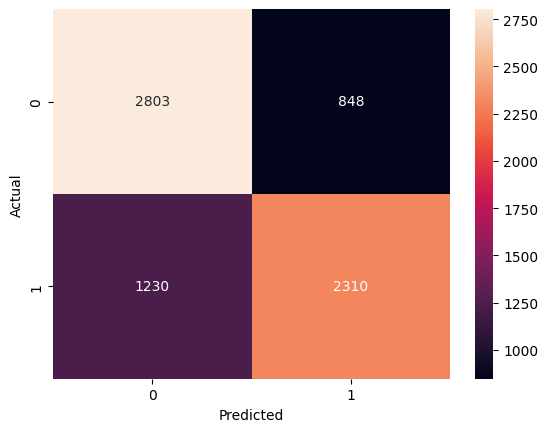

Accuracy: 0.7110276734807398
Precision: 0.7314756174794174
Recall: 0.652542372881356
F1 Score: 0.689758136757241
Area Under Curve: 0.7101386200205191


In [12]:
#Rashmika
from sklearn.tree import DecisionTreeClassifier

param_grid_DT = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

DT = DecisionTreeClassifier()
DT_Test = modeler(DT, X, y, param_grid=param_grid_DT)

print('Accuracy:',DT_Test['acc'])
print('Precision:', DT_Test['prec'])
print('Recall:', DT_Test['rec'])
print('F1 Score:', DT_Test['f1'])
print('Area Under Curve:', DT_Test['auc'])  

Random Forrest Classifier

Best Parameters:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


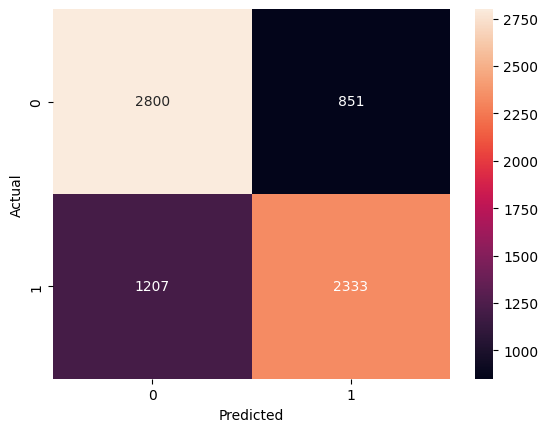

Accuracy: 0.7138089278264498
Precision: 0.7327261306532663
Recall: 0.6590395480225989
F1 Score: 0.6939321832242713
Area Under Curve: 0.712976361247673


In [13]:
#Sakuni
from sklearn.ensemble import RandomForestClassifier

param_grid_RF = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

RF = RandomForestClassifier()

RF_Test = modeler(RF, X, y, param_grid=param_grid_RF)

print('Accuracy:',RF_Test['acc'])
print('Precision:', RF_Test['prec'])
print('Recall:', RF_Test['rec'])
print('F1 Score:', RF_Test['f1'])
print('Area Under Curve:', RF_Test['auc'])


Gaussian NB - Tehan

Best Parameters:  {'priors': array([0.5, 0.5]), 'var_smoothing': np.float64(0.23101297000831597)}


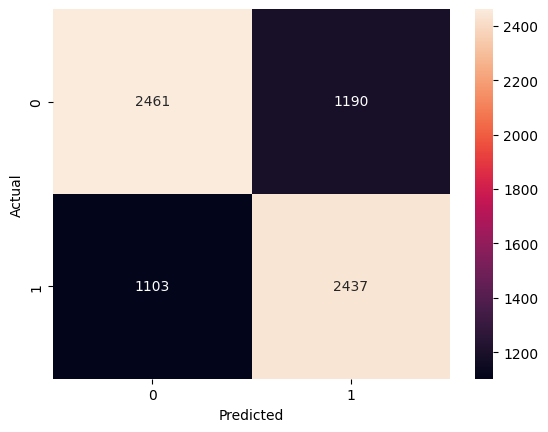

Accuracy: 0.6811291892643582
Precision: 0.6719051557761235
Recall: 0.6884180790960452
F1 Score: 0.6800613924933724
Area Under Curve: 0.6812399899725639


In [14]:
from sklearn.naive_bayes import GaussianNB

# Adjust the priors based on the number of classes in your target variable y
num_classes = len(np.unique(y))  # Get the number of unique classes
priors = np.full(num_classes, 1 / num_classes)  # Create equal priors for each class

param_grid_NB = {
    'var_smoothing': np.logspace(0, -9, num=100),
    'priors': [priors]  # Ensure this is an array-like structure
}

NB = GaussianNB()
NB_Test = modeler(NB, X, y, param_grid=param_grid_NB)

print('Accuracy:', NB_Test['acc'])
print('Precision:', NB_Test['prec'])
print('Recall:', NB_Test['rec'])
print('F1 Score:', NB_Test['f1'])
print('Area Under Curve:', NB_Test['auc'])

Support Vector Machine - Nithil

Best Parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


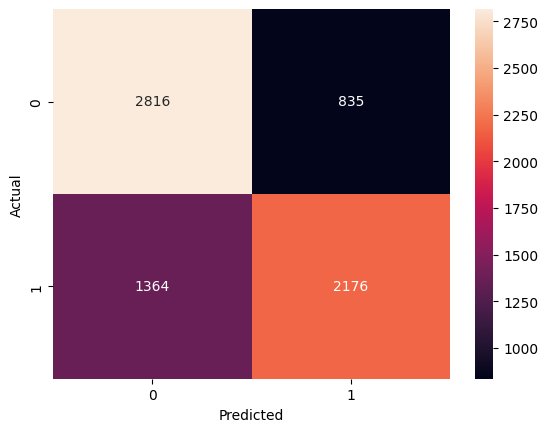

Accuracy: 0.6942010846891948
Precision: 0.7226834938558618
Recall: 0.6146892655367232
F1 Score: 0.6643260570905205
Area Under Curve: 0.6929924005032286


In [15]:
from sklearn.svm import SVC

param_grid_SVM = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

SVM = SVC()

SVM_Test = modeler(SVM, X, y, param_grid=param_grid_SVM)

print('Accuracy:',SVM_Test['acc'])
print('Precision:', SVM_Test['prec'])
print('Recall:', SVM_Test['rec'])
print('F1 Score:', SVM_Test['f1'])
print('Area Under Curve:', SVM_Test['auc'])




Logistic Regression - Vishva

Best Parameters:  {'C': 0.1, 'max_iter': 100, 'solver': 'newton-cg'}


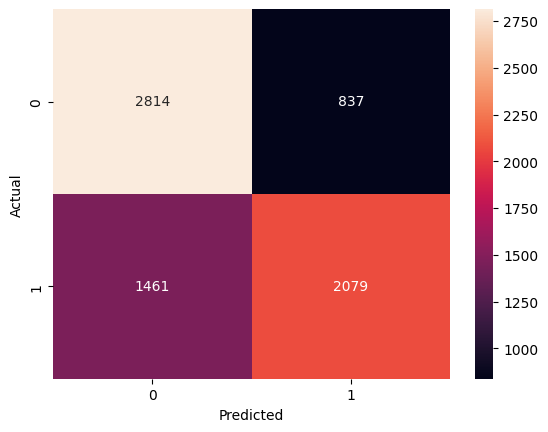

Accuracy: 0.6942010846891948
Precision: 0.7226834938558618
Recall: 0.6146892655367232
F1 Score: 0.6643260570905205
Area Under Curve: 0.6929924005032286


In [16]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

param_grid_LR = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300, 400]  # Adding max_iter options
}

LR_Test = modeler(LR, X, y, param_grid=param_grid_LR)

print('Accuracy:',SVM_Test['acc'])
print('Precision:', SVM_Test['prec'])
print('Recall:', SVM_Test['rec'])
print('F1 Score:', SVM_Test['f1'])
print('Area Under Curve:', SVM_Test['auc'])


Evaluate Metrics

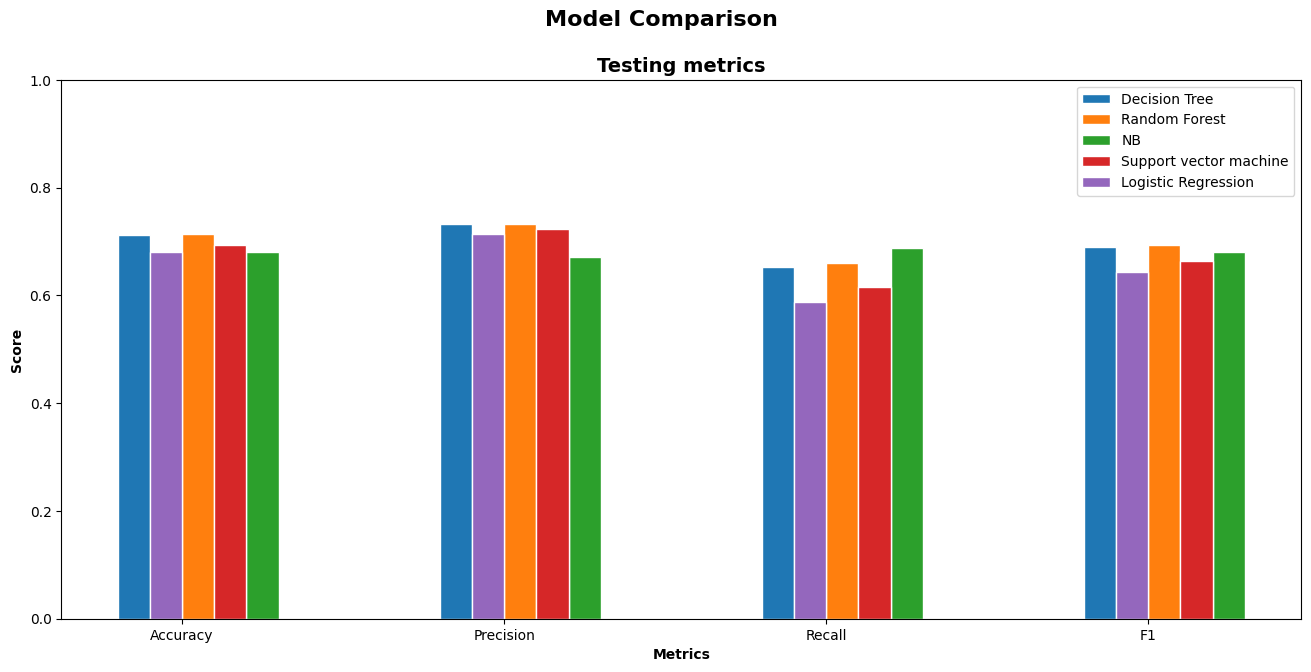

In [17]:
# Intitialize figure with two plots
fig, (ax1) = plt.subplots(1)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(16)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.1
dt_score = [DT_Test['acc'], DT_Test['prec'], DT_Test['rec'], DT_Test['f1']]
rf_score = [RF_Test['acc'], RF_Test['prec'], RF_Test['rec'], RF_Test['f1']]
nb_score  = [NB_Test['acc'], NB_Test['prec'], NB_Test['rec'], NB_Test['f1']]
svm_score = [SVM_Test['acc'], SVM_Test['prec'], SVM_Test['rec'], SVM_Test['f1']]
lr_score = [LR_Test['acc'], LR_Test['prec'], LR_Test['rec'], LR_Test['f1']]

## Set position of bar on x axis
r1 = np.arange(len(dt_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5  =[x + barWidth for x in r4]


## Make the plot
ax1.bar(r1, dt_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r3, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r5, nb_score, width=barWidth, edgecolor='white', label='NB')
ax1.bar(r4, svm_score, width=barWidth, edgecolor='white', label='Support vector machine')
ax1.bar(r2, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dt_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Testing metrics', fontsize=14, fontweight='bold')
ax1.legend()

best model training 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

Best Parameters:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

In [19]:
from sklearn.ensemble import RandomForestClassifier

RF_Best = RandomForestClassifier(bootstrap=True, max_depth=20,
                                 min_samples_leaf=1,min_samples_split=2, n_estimators=300)

In [20]:
RF_Best.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=300)

In [21]:
y_pred = RF_Best.predict(X_test)

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      3651
           1       0.73      0.66      0.69      3540

    accuracy                           0.71      7191
   macro avg       0.72      0.71      0.71      7191
weighted avg       0.71      0.71      0.71      7191



In [23]:
import pickle

In [24]:
save_path = '../static/model/selected_model.pkl'

with open(save_path, 'wb') as file:  # 'wb' means write in binary mode
    pickle.dump(RF_Best, file)

print(f"Best Random Forest Model saved to {save_path}")

Best Random Forest Model saved to ../static/model/selected_model.pkl
